## Sentiment Analysis on US Airline Reviews

This notebook is used for the sentiment analysis on US Airline Reviews. Contents of this notebook are as follows:
1. Loading the datasaet and the necessary libraries
2. Data Preprocessing
 * Analyzing the missing values in the dataset
 * Removing unnecessary columns
3. Exploratory Data Analysis
4. Visualizating the sentiments of each airlines
5. Frequency of words in postive sentiments
6. Predicitng the tweent sentiments with text data
 * Random Forest Classifier
 * XGBoost Classifier
7. Evaluation of these models using confusion matrix
8. Conclusion

In [37]:
import pandas as pd # For data processing and analysis
import numpy as np # linear algebra
import seaborn as sns # Visualisation
import matplotlib.pyplot as plt # Visualisation
import re # Regular Expressions
import nltk # Natural Language Toolkit
from nltk.corpus import stopwords # Stopwords
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # For splitting the data
from mlxtend.plotting import plot_confusion_matrix # For Confusion Matrix
from sklearn.ensemble import RandomForestClassifier # Machine Learning Model
from xgboost import XGBClassifier # Machine Learning Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score # Evaluation Metrics
from sklearn.feature_extraction.text import CountVectorizer # Feature Extraction

In [5]:
# Read the CSV
data = pd.read_csv('/content/Tweets.csv')
# To take a look at our dataset
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


First step in the data preprocessing is to check the shape of the dataframe and check the number of missing and null values. We can check about redudant columns and null values in the the specific columns.

In [6]:
data.shape

(14640, 15)

In [7]:
#Read the column names
data.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [8]:
#Use this for checking the unique values
data.nunique()

tweet_id                        14485
airline_sentiment                   3
airline_sentiment_confidence     1023
negativereason                     10
negativereason_confidence        1410
airline                             6
airline_sentiment_gold              3
name                             7701
negativereason_gold                13
retweet_count                      18
text                            14427
tweet_coord                       832
tweet_created                   14247
tweet_location                   3081
user_timezone                      85
dtype: int64

In [9]:
#To check the null values
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [10]:
# To check the data type of each column
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

Here we will use the datetime format for the tweet_created column from which we can analyze how many tweets are posted on each specific date of the year.

In [11]:
#tweet_created column got the data records and showing type in object we have to change it of date time format
data['tweet_created'] = pd.to_datetime(data['tweet_created']).dt.date

In [12]:
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24,NaN,Pacific Time (US & Canada)


In [13]:
nooftweets = data.groupby('tweet_created').size()

In [14]:
nooftweets

tweet_created
2015-02-16       4
2015-02-17    1408
2015-02-18    1344
2015-02-19    1376
2015-02-20    1500
2015-02-21    1557
2015-02-22    3079
2015-02-23    3028
2015-02-24    1344
dtype: int64

Now we will calculate the percentage of null values in each column from which we can decide which columns to delete.
From the above output we can see that the columns which has more than 90% of null values are airline_sentiment_gold, negativereason_gold, tweet_coord.

In [15]:
# TO treat the null values we will create the percentage of null values in each column
print("Percentage null or na values in each column:")
((data.isnull() | data.isna()).sum() * 100 / data.index.size).round(2)

Percentage null or na values in each column:


tweet_id                         0.00
airline_sentiment                0.00
airline_sentiment_confidence     0.00
negativereason                  37.31
negativereason_confidence       28.13
airline                          0.00
airline_sentiment_gold          99.73
name                             0.00
negativereason_gold             99.78
retweet_count                    0.00
text                             0.00
tweet_coord                     93.04
tweet_created                    0.00
tweet_location                  32.33
user_timezone                   32.92
dtype: float64

In [16]:
#Better to delete the columns which has more than 90% of null values
data = data.drop(columns=['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'])
data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24,NaN,Pacific Time (US & Canada)


Here we will check the number of tweets regarding each airline.

In [17]:
#Here I will calculate the total number of tweets regarding each airline
print("Total number of tweets regarding each airline", data.groupby('airline')['airline_sentiment'].count().sort_values(ascending=False))
airlines = ['US Airways', 'United', 'Southwest', 'Delta', 'Virgin America', 'American']


Total number of tweets regarding each airline airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline_sentiment, dtype: int64


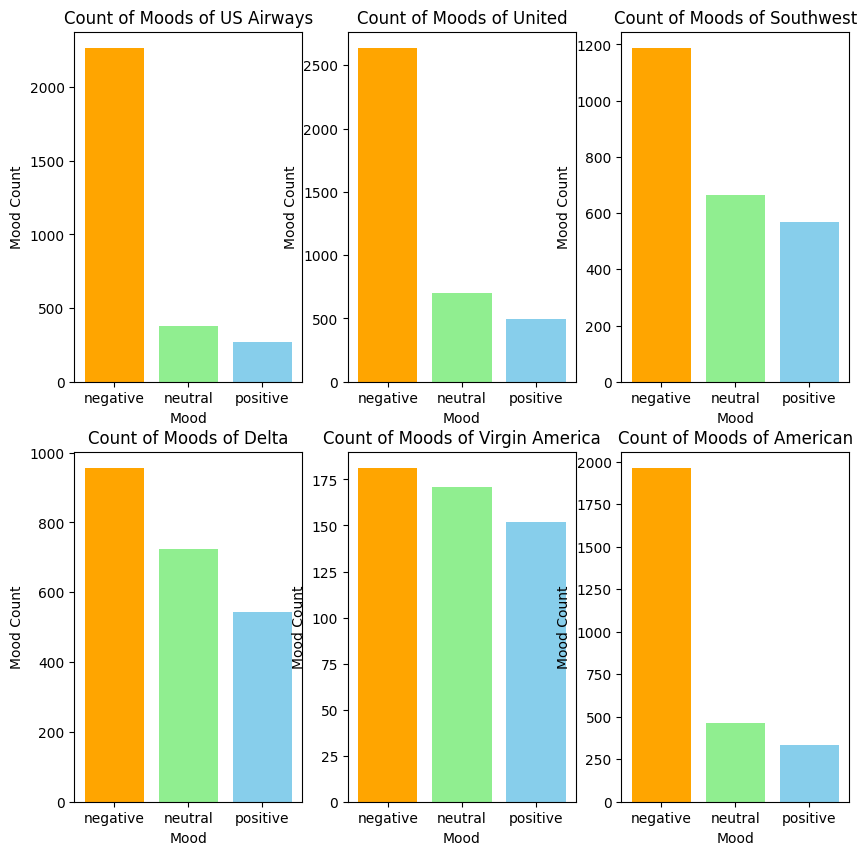

In [18]:
#In the following subplots I will try to plot no of tweets regarding each airline which are postive, neutral and negative
plt.figure(figsize=(10, 10))
for i in airlines:
  indices= airlines.index(i)
  plt.subplot(2,3,indices+1)
  new_data=data[data['airline']==i]
  count=new_data['airline_sentiment'].value_counts()
  Index = [1,2,3]
  plt.bar(Index,count, color=['orange', 'lightgreen', 'skyblue'])
  plt.xticks(Index,['negative','neutral','positive'])
  plt.ylabel('Mood Count')
  plt.xlabel('Mood')
  plt.title('Count of Moods of '+i)


In the above subplots for each airline we can see the number of tweets regarding each sentiment. We will see the positive, neutral and negative tweets.

Now we will calculate the frequency of positive sentiments words in each from the tweets. From the output we can say that the most frequent words in the positive tweets are 'thanks', 'best', 'thank', 'great', 'love', 'happy'. There are other words which are frequent in the tweets but we will ignore them for now.

In [19]:
# Now I will calculate the frequency of words in each sentiment
positive=data[data['airline_sentiment']=='positive']
words = ' '.join(positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

def freq(str):
  str = str.split()
  str_new = []

  for i in str:

    if i not in str_new:

      str_new.append(i)

  for i in range(0, len(str_new)):
    if(str.count(str_new[i]) > 50):
      print('The word:', str_new[i], 'has been used', str.count(str_new[i]), 'times')

print(freq(cleaned_word))


The word: to has been used 923 times
The word: the has been used 924 times
The word: time has been used 59 times
The word: I has been used 574 times
The word: fly has been used 54 times
The word: this has been used 143 times
The word: :) has been used 96 times
The word: it has been used 166 times
The word: was has been used 226 times
The word: and has been used 416 times
The word: an has been used 74 times
The word: good has been used 75 times
The word: so has been used 163 times
The word: much has been used 54 times
The word: is has been used 219 times
The word: a has been used 501 times
The word: great has been used 144 times
The word: my has been used 320 times
The word: &amp; has been used 77 times
The word: on has been used 327 times
The word: I'm has been used 67 times
The word: flying has been used 59 times
The word: your has been used 212 times
The word: all has been used 92 times
The word: from has been used 124 times
The word: Thanks! has been used 69 times
The word: for has 

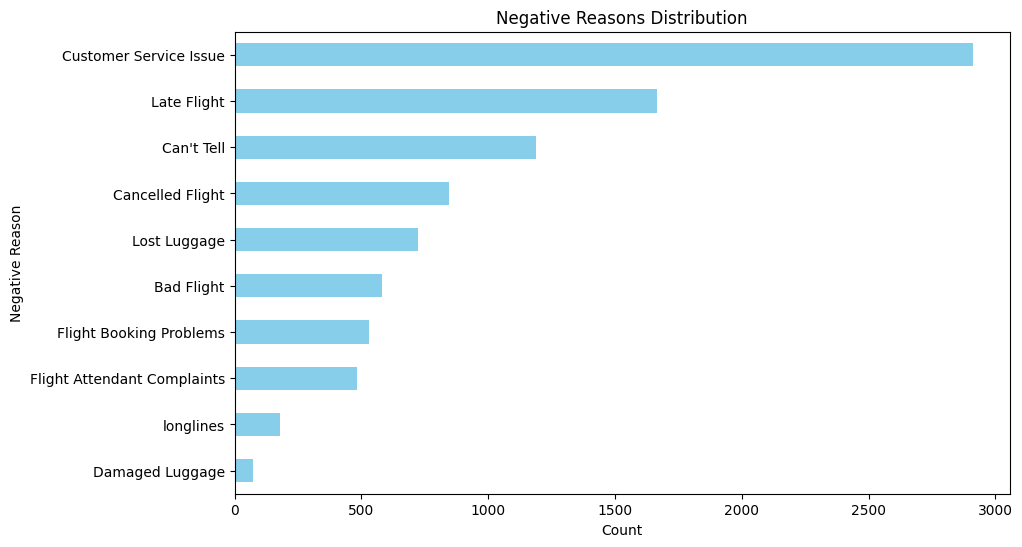

In [20]:
# Reading the negative reasons
negative_reason_counts = data['negativereason'].value_counts()
negative_reason_counts = negative_reason_counts.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
negative_reason_counts.plot(kind='barh', color='skyblue')
plt.title('Negative Reasons Distribution')
plt.xlabel('Count')
plt.ylabel('Negative Reason')
plt.show()

From the above graph we can conclued that most of the negative sentiments are due to customer service issues followed by late flights and cancellations.

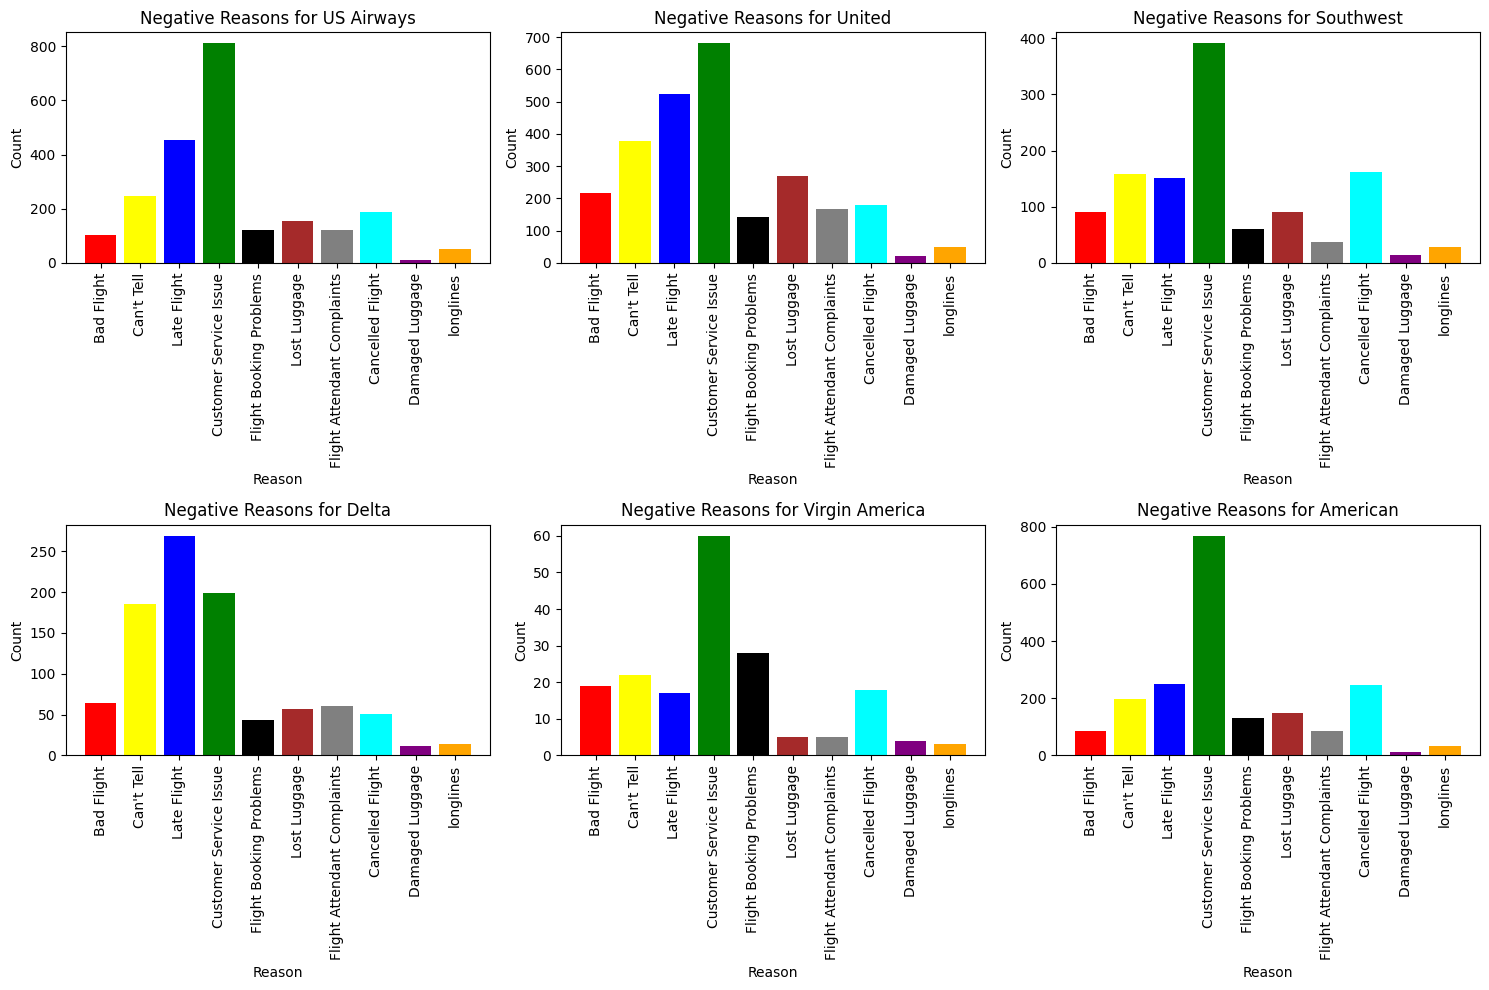

In [21]:
# Try to find the negative reason for each flight
def negative_reasons(Airline):
    if Airline == 'All':
        a = data
    else:
        a = data[data['airline'] == Airline]

    count = dict(a['negativereason'].value_counts())
    unique_reasons = [x for x in data['negativereason'].unique() if not pd.isna(x)]
    reason_frame = pd.DataFrame({'Reasons': unique_reasons})
    reason_frame['count'] = reason_frame['Reasons'].apply(lambda x: count.get(x, 0))
    return reason_frame

# Function to plot reasons
def plot_reasons(Airline, ax):
    a = negative_reasons(Airline)
    count = a['count']
    Index = range(1, len(a) + 1)
    colors = ['red', 'yellow', 'blue', 'green', 'black', 'brown', 'gray', 'cyan', 'purple', 'orange']

    ax.bar(Index, count, color=colors)
    ax.set_xticks(Index)
    ax.set_xticklabels(a['Reasons'], rotation=90)
    ax.set_ylabel('Count')
    ax.set_xlabel('Reason')
    ax.set_title(f'Negative Reasons for {Airline}')

# Creating subplots for each airline
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
for i, airline in enumerate(airlines):
    plot_reasons(airline, axs[i // 3, i % 3])

# Removiing  any remaining empty subplots
if len(airlines) < 6:
    for i in range(len(airlines), 6):
        axs[i // 3, i % 3].axis('off')

plt.tight_layout()
plt.show()


Customer service issues are the most common reason for US airways, United, American, Southwest and Virgin America.
Late Flights are the main negative reason for Delta.
One of the interesting things about this visualizations is Virgin America has the least number of negative reasons.

Now we will preprocess the tweet text data.

In [22]:
# Now we will try to preprocessing the text tweet data

def tweet_to_words(tweet):
  letters_only = re.sub("[^a-zA-Z]", " ", tweet)
  words = letters_only.lower().split()
  stops = set(stopwords.words("english"))
  meaningful_words = [w for w in words if not w in stops]
  return(" ".join(meaningful_words))

In [23]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [24]:
data['clean_tweet'] = data['text'].apply(lambda x: tweet_to_words(x))

The data is split in the following way
85% Training and 15% Testing

In [25]:
train,test = train_test_split(data, test_size=0.15, random_state=42)

In [26]:
train_clean_tweet = []
for tweet in train['clean_tweet']:
  train_clean_tweet.append(tweet)
test_clean_tweet = []
for tweet in test['clean_tweet']:
  test_clean_tweet.append(tweet)

Predicting train the data on Random Forest Classifier and XGBoost Classifier as both are supervised learning algorithms. From the below outputs you can see that both the models are performing well. But XGBoost Classifier is performing better. It is providing accuracy of 80%

In [27]:
# Function to train and evaluate a classifier
def train_and_evaluate_classifier(classifier, X_train, y_train, X_test, y_test):
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return accuracy, precision, recall, f1

# Map string classes to integers
class_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train = train['airline_sentiment'].map(class_mapping)
y_test = test['airline_sentiment'].map(class_mapping)

# Vectorizing Text Data
vectorizer = CountVectorizer(analyzer='word')
X_train = vectorizer.fit_transform(train['text'])
X_test = vectorizer.transform(test['text'])

# Training and Evaluating Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_accuracy, rf_precision, rf_recall, rf_f1 = train_and_evaluate_classifier(rf_classifier, X_train, y_train, X_test, y_test)

print("Random Forest Classifier:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

# Training and Evaluating XGBoost Classifier
xgb_classifier = XGBClassifier()
xgb_accuracy, xgb_precision, xgb_recall, xgb_f1 = train_and_evaluate_classifier(xgb_classifier, X_train, y_train, X_test, y_test)

print("\nXGBoost Classifier:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1)

Random Forest Classifier:
Accuracy: 0.7768670309653917
Precision: 0.772448983641882
Recall: 0.7768670309653917
F1 Score: 0.7535914680352302

XGBoost Classifier:
Accuracy: 0.8073770491803278
Precision: 0.7990433345329441
Recall: 0.8073770491803278
F1 Score: 0.7995748816908878


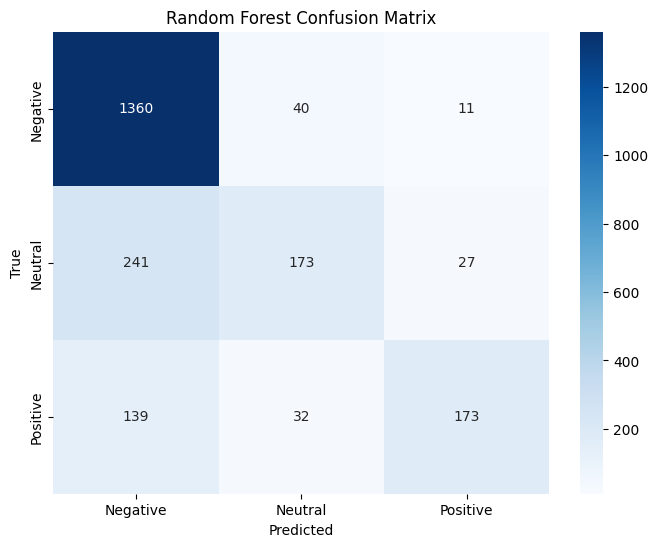

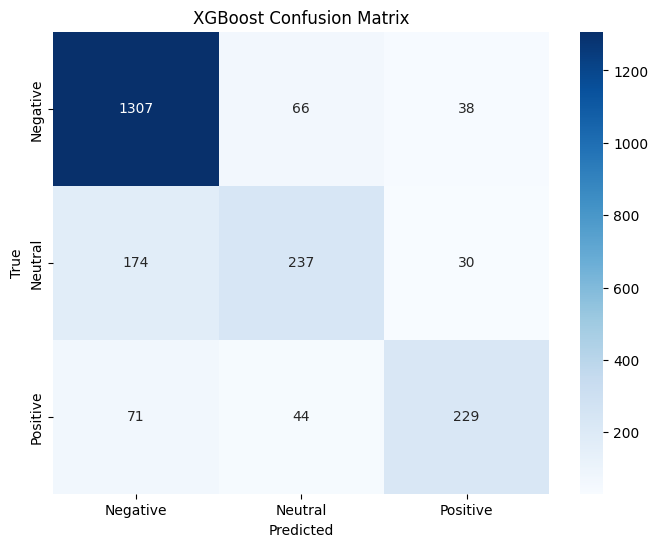

In [41]:
# Function to plot a confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_classifier.predict(X_test), classes=['Negative', 'Neutral', 'Positive'], title='Random Forest Confusion Matrix')

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_classifier.predict(X_test), classes=['Negative', 'Neutral', 'Positive'], title='XGBoost Confusion Matrix')

As you can see the above confusion matrix shows that the XGBoost Classifier is performing better and it is providing acutal sentiment values of negative, neutral and positive.